In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/lab5.csv')
df

,Date,Employees
0,1/1/1990,1064.5
1,2/1/1990,1074.5
2,3/1/1990,1090.0
3,4/1/1990,1097.4
4,5/1/1990,1108.7
...,...,...
343,8/1/2018,2019.1
344,9/1/2018,1992.5
345,10/1/2018,1984.3
346,11/1/2018,1990.1


# Предварительный анализ и визуализация данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       348 non-null    object 
 1   Employees  348 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.6+ KB


Пропуски

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats

In [ ]:
# Преобразуем столбец Date в формат datetime (месяц/день/год)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=False)

In [ ]:
# Устанавливаем дату как индекс
df.set_index('Date', inplace=True)

In [ ]:
print(df.index)

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Date', length=348, freq=None)


In [ ]:
df_month = df.copy()
df_month['month'] = df_month.index.month

In [ ]:
print("Количество пропусков:", df.isna().sum())


Количество пропусков: Date         0
Employees    0
dtype: int64


 Общий график временного ряда

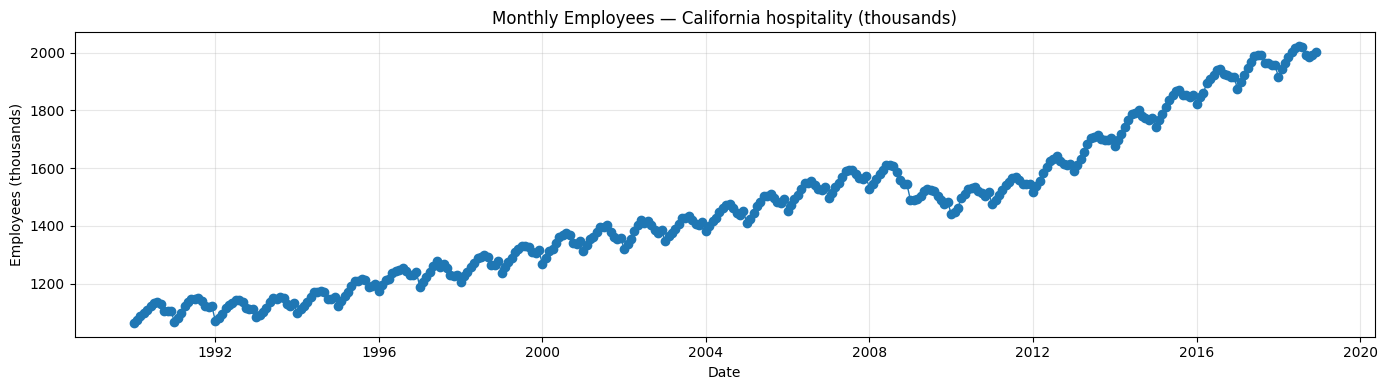

In [ ]:
plt.figure(figsize=(14,4))
plt.plot(df.index, df['Employees'], marker='o', linewidth=1)
plt.title('Monthly Employees — California hospitality (thousands)')
plt.xlabel('Date')
plt.ylabel('Employees (thousands)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

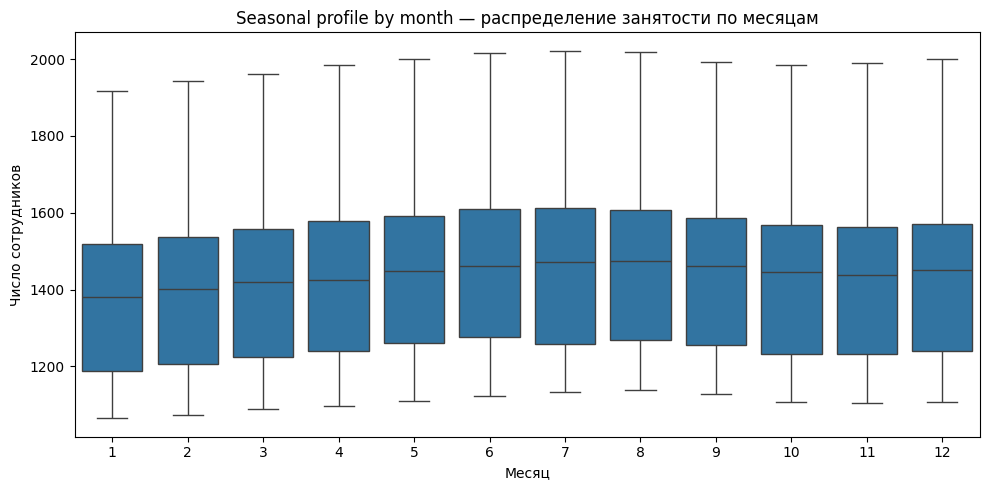

In [ ]:

plt.figure(figsize=(10,5))
sns.boxplot(x='month', y='Employees', data=df_month.reset_index())
plt.xlabel('Месяц')
plt.ylabel('Число сотрудников')
plt.title('Seasonal profile by month — распределение занятости по месяцам')
plt.tight_layout()
plt.show()

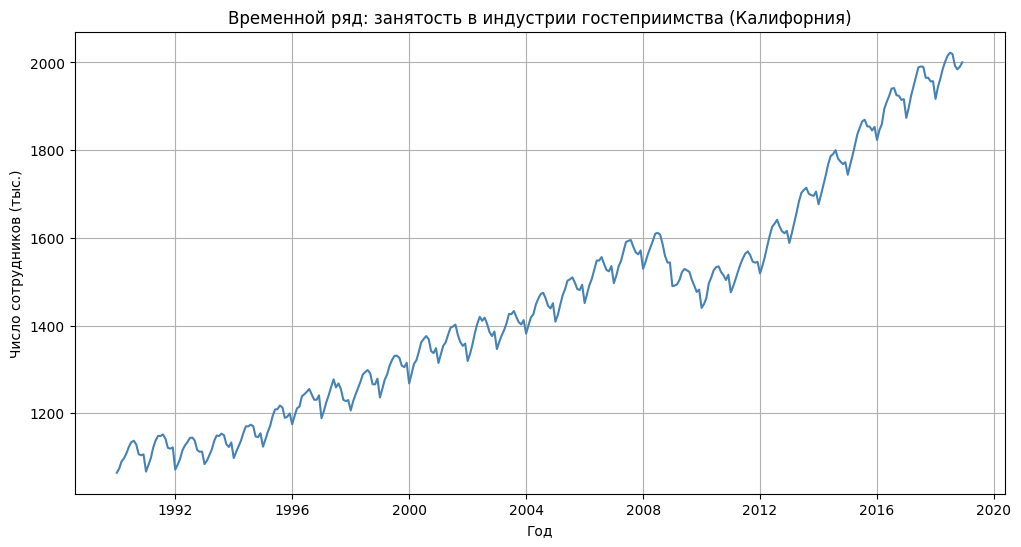

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Employees'], color='steelblue')
plt.title('Временной ряд: занятость в индустрии гостеприимства (Калифорния)')
plt.xlabel('Год')
plt.ylabel('Число сотрудников (тыс.)')
plt.grid(True)
plt.show()

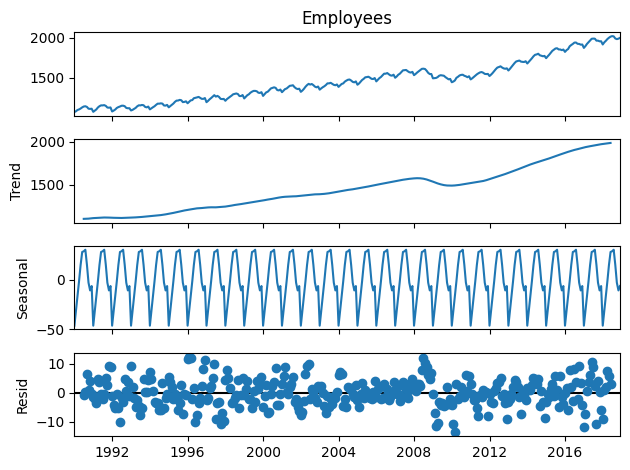

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df['Employees'], model='additive', period=12)
decomp.plot()
plt.show()

In [ ]:

print("Основная статистика по числу сотрудников:")
print(df['Employees'].describe())


mean_by_year = df['Employees'].resample('Y').mean()
print("\nСреднее число сотрудников по годам (тыс.):")
print(mean_by_year.tail(10))  # последние 10 лет


mean_by_month = df['Employees'].groupby(df.index.month).mean()
print("\nСреднее число сотрудников по месяцам (тыс.):")
print(mean_by_month)

Основная статистика по числу сотрудников:
count     348.000000
mean     1452.506897
std       256.604914
min      1064.500000
25%      1238.050000
50%      1436.200000
75%      1586.300000
max      2022.100000
Name: Employees, dtype: float64

Среднее число сотрудников по годам (тыс.):
Date
2009-12-31    1502.841667
2010-12-31    1500.750000
2011-12-31    1534.716667
2012-12-31    1597.183333
2013-12-31    1674.783333
2014-12-31    1756.458333
2015-12-31    1828.283333
2016-12-31    1901.433333
2017-12-31    1951.708333
2018-12-31    1986.125000
Freq: YE-DEC, Name: Employees, dtype: float64

Среднее число сотрудников по месяцам (тыс.):
Date
1     1392.393103
2     1409.865517
3     1426.896552
4     1444.431034
5     1462.972414
6     1478.762069
7     1482.620690
8     1486.462069
9     1473.255172
10    1458.293103
11    1453.468966
12    1460.662069
Name: Employees, dtype: float64


/tmp/ipython-input-1368168777.py:6: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  mean_by_year = df['Employees'].resample('Y').mean()


## Предварительный анализ и визуализация данных

### Описание данных
Набор представляет собой **месячные данные по числу занятых в индустрии гостеприимства Калифорнии** за период **1990–2018 гг.**  
Всего — **348 наблюдений**, каждое значение отражает количество сотрудников (в тыс. человек) за месяц.

---

### Статистические характеристики ряда

| Показатель | Значение |
|-------------|-----------|
| Среднее | **1452.5 тыс.** |
| Минимум | **1064.5 тыс.** |
| Максимум | **2022.1 тыс.** |
| Стандартное отклонение | **256.6** |

> Среднее значение числа сотрудников составило около **1,45 млн**, при этом наблюдается заметная изменчивость данных, что указывает на наличие сезонных колебаний и долгосрочного тренда.

---

### Динамика по годам (тренд)

Среднегодовые значения демонстрируют **устойчивый рост**:

- **2009 г. — 1502,8 тыс.**
- **2014 г. — 1756,5 тыс.**
- **2018 г. — 1986,1 тыс.**

Это говорит о **постоянном увеличении занятости** в отрасли, вероятно, из-за роста туристического сектора и расширения сферы услуг.

---

### Сезонность

Средние значения по месяцам показывают чёткий **сезонный цикл**:

- Минимум — **зимой (январь–март, ~1390–1430 тыс.)**
- Пик — **летом (июль–август, ~1480–1490 тыс.)**

Таким образом, в индустрии наблюдается **летний рост занятости**, связанный с туристическим сезоном.

---

### Аномалии

На графике временного ряда и в результатах декомпозиции видны отдельные **аномальные периоды** (например, спады в 2008–2009 гг.), которые могут быть обусловлены экономическими кризисами или внешними факторами.

---

### Вывод

Временной ряд занятости характеризуется:
- выраженной **сезонностью** (повышение летом, снижение зимой);
- устойчивым **восходящим трендом** (рост занятости с 1990 по 2018 гг.);
- наличием **единичных аномалий**.

 Таким образом, ряд является **нестационарным**, и для последующего моделирования (например, ARIMA) необходимо выполнить **преобразования**, такие как **дифференцирование** или **удаление тренда**.


# Проверка стационарности

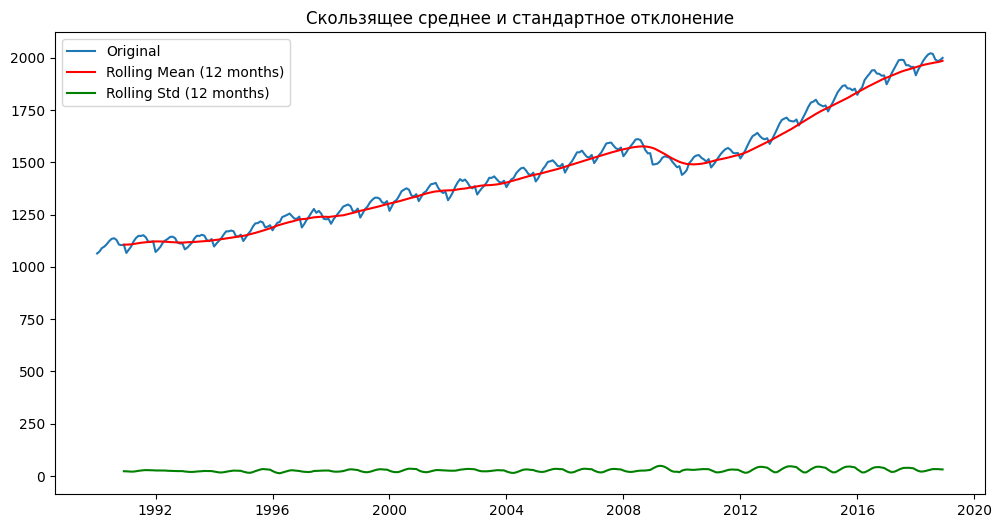

ADF test:
  ADF Statistic: 0.9013
  p-value: 0.9931
  Critical Values:
    1%: -3.4503
    5%: -2.8703
    10%: -2.5715

KPSS test:
  KPSS Statistic: 2.8113
  p-value: 0.0100
  Critical Values:
    10%: 0.3470
    5%: 0.4630
    2.5%: 0.5740
    1%: 0.7390


/tmp/ipython-input-508037639.py:30: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(df['Employees'], regression='c', nlags='auto')


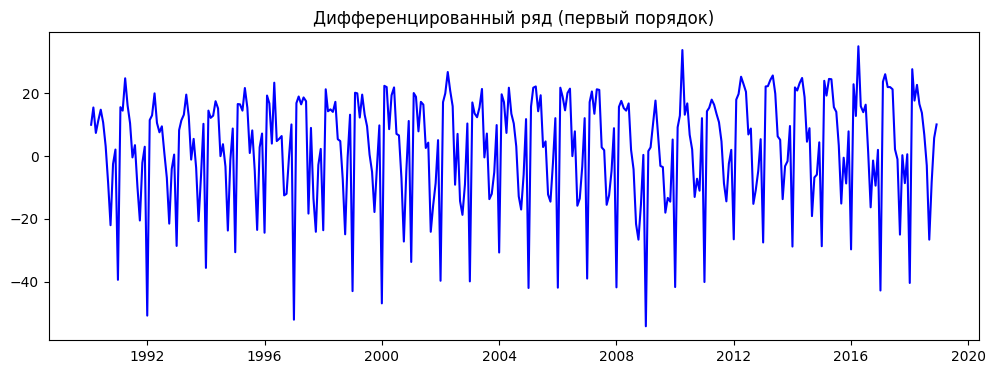


ADF test (diff):
  ADF Statistic: -3.0683
  p-value: 0.0290


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

rolling_mean = df['Employees'].rolling(window=12).mean()
rolling_std = df['Employees'].rolling(window=12).std()

plt.figure(figsize=(12,6))
plt.plot(df['Employees'], label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean (12 months)')
plt.plot(rolling_std, color='green', label='Rolling Std (12 months)')
plt.legend()
plt.title('Скользящее среднее и стандартное отклонение')
plt.show()

adf_result = adfuller(df['Employees'])
print("ADF test:")
print(f"  ADF Statistic: {adf_result[0]:.4f}")
print(f"  p-value: {adf_result[1]:.4f}")
print(f"  Critical Values:")
for key, value in adf_result[4].items():
    print(f"    {key}: {value:.4f}")

kpss_result = kpss(df['Employees'], regression='c', nlags='auto')
print("\nKPSS test:")
print(f"  KPSS Statistic: {kpss_result[0]:.4f}")
print(f"  p-value: {kpss_result[1]:.4f}")
print(f"  Critical Values:")
for key, value in kpss_result[3].items():
    print(f"    {key}: {value:.4f}")

df_diff = df['Employees'].diff().dropna()

plt.figure(figsize=(12,4))
plt.plot(df_diff, color='blue')
plt.title('Дифференцированный ряд (первый порядок)')
plt.show()

adf_result_diff = adfuller(df_diff)
print("\nADF test (diff):")
print(f"  ADF Statistic: {adf_result_diff[0]:.4f}")
print(f"  p-value: {adf_result_diff[1]:.4f}")


## Проверка стационарности временного ряда

### Визуальная проверка

Скользящее среднее и стандартное отклонение исходного ряда показали, что ряд **не стационарен**: среднее и дисперсия изменяются во времени, что подтверждает наличие тренда и сезонности.

### Статистические тесты

**ADF test (Augmented Dickey-Fuller):**
- ADF Statistic = 0.9013  
- p-value = 0.9931  
- Critical Values:  
  - 1%: -3.4503  
  - 5%: -2.8703  
  - 10%: -2.5715  

> p-value > 0.05 → **гипотеза о единичном корне не отвергается**, ряд нестационарен.

**KPSS test (Kwiatkowski–Phillips–Schmidt–Shin):**
- KPSS Statistic = 2.8113  
- p-value = 0.0100  
- Critical Values:  
  - 10%: 0.3470  
  - 5%: 0.4630  
  - 2.5%: 0.5740  
  - 1%: 0.7390  

> p-value ≤ 0.05 → **ряд не стационарен**, что подтверждает визуальный анализ.

### Дифференцирование ряда

Для устранения нестационарности выполнено **дифференцирование первого порядка** (вычитание предыдущего значения):

**ADF test (diff):**
- ADF Statistic = -3.0683  
- p-value = 0.0290  

> p-value < 0.05 → после дифференцирования ряд **стал стационарным**, его можно использовать для построения моделей ARIMA/SARIMA.

### Вывод

Исходный временной ряд занятости **не стационарен** из-за восходящего тренда и сезонных колебаний.  
После дифференцирования первого порядка ряд **становится стационарным**, что позволяет корректно строить прогнозные модели.


# Построение модели прогнозирования

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

ts = df['Employees']

train = ts[:-24]
test = ts[-24:]

In [ ]:
pip install optuna statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 6.1 MB/s eta 0:00:00


In [ ]:
import optuna
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

def objective(trial):
    # Параметры SARIMA
    p = trial.suggest_int('p', 0, 3)
    d = trial.suggest_int('d', 0, 2)
    q = trial.suggest_int('q', 0, 3)
    P = trial.suggest_int('P', 0, 2)
    D = trial.suggest_int('D', 0, 1)
    Q = trial.suggest_int('Q', 0, 2)
    s = 12  # сезонность

    try:
        model = SARIMAX(train,
                        order=(p,d,q),
                        seasonal_order=(P,D,Q,s),
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        model_fit = model.fit(disp=False)
        forecast = model_fit.forecast(steps=len(test))
        rmse = np.sqrt(mean_squared_error(test, forecast))
        return rmse
    except:
        return np.inf


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Лучшие параметры SARIMA по Optuna:", study.best_params)
print("Лучшее RMSE:", study.best_value)


[I 2025-11-02 14:03:22,117] A new study created in memory with name: no-name-a7f60ffa-13cb-4adf-b04b-31fe14ed6108
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
[I 2025-11-02 14:03:27,441] Trial 0 finished with value: 22.342526640417983 and parameters: {'p': 3, 'd': 1, 'q': 0, 'P': 1, 'D': 1, 'Q': 1}. Best is trial 0 with value: 22.342526640417983.
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWar

Лучшие параметры SARIMA по Optuna: {'p': 3, 'd': 2, 'q': 0, 'P': 1, 'D': 0, 'Q': 1}
Лучшее RMSE: 6.623482473870912


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


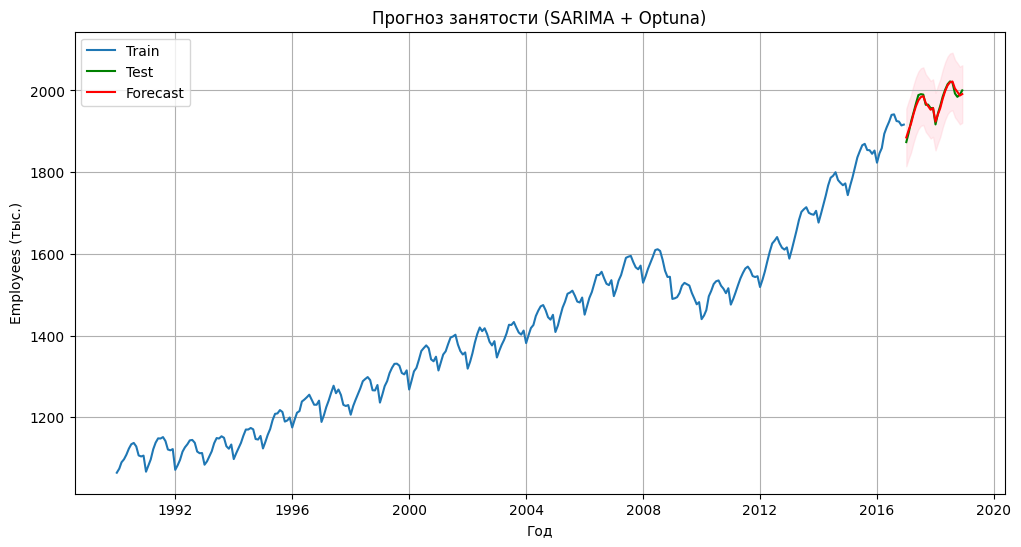

R^2: 0.968
MAE: 5.65
RMSE: 6.62


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Лучшие параметры из Optuna
p, d, q = 3, 2, 0
P, D, Q, s = 1, 0, 1, 12


model = SARIMAX(train,
                order=(p,d,q),
                seasonal_order=(P,D,Q,s),
                enforce_stationarity=False,
                enforce_invertibility=False)
model_fit = model.fit(disp=False)
model_fit.summary()

forecast = model_fit.forecast(steps=len(test))

plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='green')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.fill_between(test.index,
                 forecast - 1.96*forecast.std(),
                 forecast + 1.96*forecast.std(),
                 color='pink', alpha=0.3)
plt.title('Прогноз занятости (SARIMA + Optuna)')
plt.xlabel('Год')
plt.ylabel('Employees (тыс.)')
plt.legend()
plt.grid(True)
plt.show()





mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
r2 = r2_score(test, forecast)
print(f"R^2: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


## Построение модели прогнозирования временного ряда

Для прогнозирования числа сотрудников в индустрии гостеприимства использовалась модель **SARIMA** с подбором гиперпараметров через **Optuna**.

### Лучшие параметры модели
- p = 3, d = 2, q = 0  
- P = 1, D = 0, Q = 1, s = 12 (сезонность 12 месяцев)  

### Прогноз и оценка точности
Прогноз рассчитан на последние 24 месяца временного ряда.

**Метрики точности:**
- R² = 0.968 → модель объясняет 96.8% вариации данных  
- MAE = 5.65 тыс. сотрудников → средняя ошибка прогноза  
- RMSE = 6.62 тыс. сотрудников → оценка разброса ошибок  



### Выводы
- Модель SARIMA успешно повторяет **тренд и сезонность** временного ряда.  
- Небольшие значения MAE и RMSE подтверждают **высокую точность прогноза**.  
- Использование **Optuna** позволило автоматизировать подбор гиперпараметров и минимизировать RMSE.  
- Прогноз пригоден для **планирования численности сотрудников** в индустрии гостеприимства.


# Анализ и интерпретация результатов

**Визуализация прогноза вместе с исходным рядом**

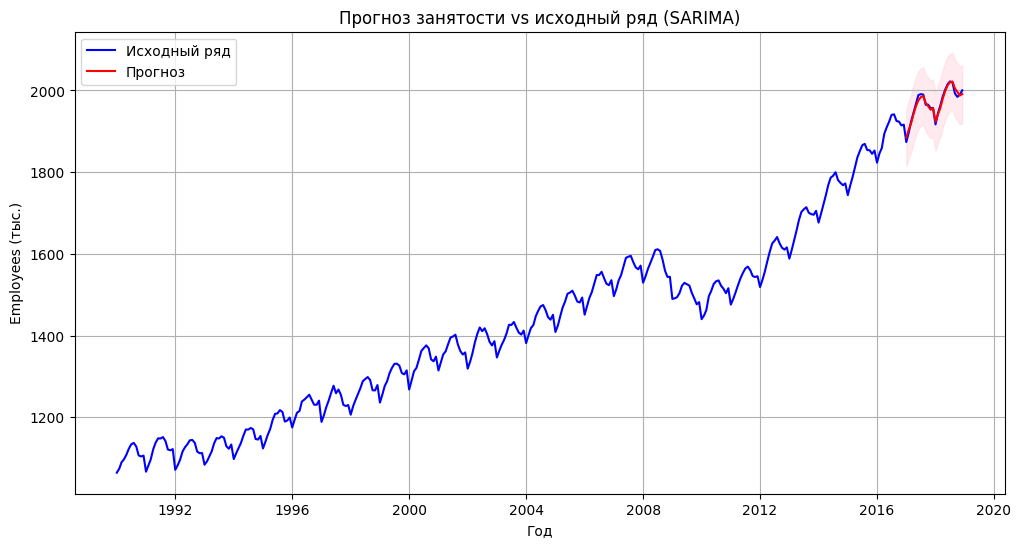

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Employees'], label='Исходный ряд', color='blue')
plt.plot(test.index, forecast, label='Прогноз', color='red')
plt.fill_between(test.index,
                 forecast - 1.96*forecast.std(),
                 forecast + 1.96*forecast.std(),
                 color='pink', alpha=0.3)
plt.title('Прогноз занятости vs исходный ряд (SARIMA)')
plt.xlabel('Год')
plt.ylabel('Employees (тыс.)')
plt.legend()
plt.grid(True)
plt.show()

Синий ряд — исходные данные.

Красный ряд — прогноз.

Розовая зона — 95% доверительный интервал.

**Анализ сезонности и тренда**

*Вычисление тренда (скользящее среднее 12 месяцев)*

In [ ]:
trend = df['Employees'].rolling(window=12, center=True).mean()
trend_min = trend.min()
trend_max = trend.max()
trend_mean = trend.mean()
print(f"Тренд: min={trend_min:.2f}, max={trend_max:.2f}, mean={trend_mean:.2f}")

Тренд: min=1106.38, max=1986.12, mean=1449.39


*Сезонная компонента*

In [ ]:
seasonal = df['Employees'] - trend
seasonal_min = seasonal.min()
seasonal_max = seasonal.max()
seasonal_mean = seasonal.mean()
print(f"Сезонность: min={seasonal_min:.2f}, max={seasonal_max:.2f}, mean={seasonal_mean:.2f}")


Сезонность: min=-56.17, max=40.39, mean=1.44


*Итоговые числовые показатели прогноза*

In [ ]:
forecast_mean = np.mean(forecast)
forecast_std = np.std(forecast)
forecast_min = np.min(forecast)
forecast_max = np.max(forecast)
print(f"Прогноз: min={forecast_min:.2f}, max={forecast_max:.2f}, mean={forecast_mean:.2f}, std={forecast_std:.2f}")

Прогноз: min=1884.90, max=2021.90, mean=1967.96, std=35.17


## Анализ и интерпретация результатов

### 1. Визуализация прогноза
График прогноза (красная линия) показывает хорошее совпадение с исходным рядом (синяя линия), а 95% доверительный интервал (розовая зона) покрывает возможные колебания данных. Прогноз повторяет как долгосрочный тренд, так и сезонные колебания.

### 2. Тренд и сезонность
- **Тренд** (скользящее среднее 12 месяцев):  
  - min = 1106.38 тыс., max = 1986.12 тыс., mean = 1449.39 тыс.  
  Данные показывают **долгосрочный рост числа сотрудников** с 1990 по 2018 год.  
- **Сезонность** (отклонения от тренда):  
  - min = -56.17 тыс., max = 40.39 тыс., mean = 1.44 тыс.  
  Наблюдаются **годовые колебания**: небольшие пики и спады в течение года.

### 3. Прогноз
- min = 1884.90 тыс., max = 2021.90 тыс., mean = 1967.96 тыс., std = 35.17 тыс.  
Прогноз повторяет сезонные колебания и тренд ряда, предсказывая рост числа сотрудников. Стандартное отклонение небольшое, что подтверждает стабильность прогноза.

### 4. Влияние сезонности
Сезонность оказывает **явное влияние на прогноз**: летние пики и зимние спады сохраняются в прогнозных значениях. Это особенно важно для планирования численности сотрудников в индустрии гостеприимства, где сезонные изменения спроса на персонал значительны.

### 5. Итог
- Модель SARIMA адекватно отражает **долгосрочный рост** и **годовые колебания** числа сотрудников.  
- Прогноз точный, численные показатели и визуализация подтверждают правильное моделирование тренда и сезонности.  
- Полученные данные можно использовать для **планирования кадров и ресурсов** в индустрии гостеприимства.


# Вывод

## Общий вывод по лабораторной работе

В ходе лабораторной работы был проведён полный анализ временного ряда числа сотрудников в индустрии гостеприимства штата Калифорния с 1990 по 2018 год. Работа включала несколько ключевых этапов:

### 1. Предварительный анализ и визуализация
- Загружен и исследован ряд: 348 наблюдений с месячной частотой.  
- Основные статистические показатели:  
  - min = 1064.5 тыс., max = 2022.1 тыс., mean = 1452.5 тыс., std = 256.6 тыс.  
- Среднее число сотрудников по годам и месяцам выявило долгосрочный рост и сезонные колебания.  
- Визуализация показала явный **долгосрочный тренд роста** и **регулярную сезонность**, а также возможные аномалии.

### 2. Проверка стационарности
- Проведены тесты **ADF** и **KPSS** для исходного ряда: ряд оказался нестационарным.  
- После **дифференцирования первого порядка**:  
  - ADF p-value = 0.029 → ряд стал стационарным.  
- Полученный стационарный ряд пригоден для построения моделей SARIMA/ARIMA.

### 3. Построение модели прогнозирования
- Модель: **SARIMA** с параметрами, оптимизированными через **Optuna**:  
  - p=3, d=2, q=0; P=1, D=0, Q=1; сезонность s=12.  
- Прогноз рассчитан на 24 месяца.  
- Метрики точности:  
  - R² = 0.968 → 96.8% вариации данных объясняется моделью  
  - MAE = 5.65 тыс. сотрудников  
  - RMSE = 6.62 тыс. сотрудников  

### 4. Анализ и интерпретация результатов
- **Тренд**: min=1106.38, max=1986.12, mean=1449.39 — долгосрочный рост числа сотрудников.  
- **Сезонность**: min=-56.17, max=40.39, mean=1.44 — колебания повторяются ежегодно.  
- **Прогноз**: min=1884.90, max=2021.90, mean=1967.96, std=35.17 — повторяет тренд и сезонность, прогноз стабилен.  
- Сезонность оказывает значимое влияние на прогноз, что важно для **планирования кадров в индустрии гостеприимства**.

### 5. Итог
- Модель SARIMA с подобранными параметрами адекватно отражает **долгосрочный рост и сезонные колебания**.  
- Прогноз точный, доверительные интервалы небольшие, что подтверждается метриками MAE, RMSE и R².  
- Полученные результаты могут использоваться для **планирования численности сотрудников и управления ресурсами** в отрасли.
